# Gene-Gene Attention Visualization & Clustering Comparison

## 1. Attention visualization results with RNA sequence file

### 1.1 Normalized Attention results with RNA sequence file

This notebook do the preprocesssing, quality control, visualizes gene-gene attention, UMAP, clustering.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scripts.gene_gene_attention_analysis import GeneGeneAttentionAnalyzer

# Initialize the analyzing targets
model_type = 'seq'
edge_type = 'tx-tx'
layer_index = 4
test_mode = False

marker_genes_dict = {
    "Tumor Cells": ["EPCAM", "CDH1", "KRT8", "CEACAM5", "SOX9", "ASCL2", "LGR5", "RNF43", "CD24", "CTNNB1"],
    "Cancer Stem Cells": ["LGR5", "EPHB3", "SLC12A2"],
    "Enterocytes": ["CA2"],
    "Goblet Cells": ["MUC12", "REG4"],
    "Enteroendocrine Cells": ["INSM1"],
    "T Cells": ["CD3D", "CD3E", "CD3G", "TRAC", "TRBC2", "CD2"],
    "Regulatory T Cells": ["FOXP3", "CTLA4", "TIGIT", "TOX"],
    "NK Cells": ["GZMA", "KLRB1"],
    "B Cells": ["MS4A1", "CD79A", "BANK1"],
    "Plasma Cells": ["TNFRSF25", "LRMP"],
    "Macrophages": ["CD14", "CD163", "APOE", "MS4A7"],
    "Dendritic Cells": ["ID2"],
    "Mast Cells": ["CPA3", "HDC"],
    "Neutrophils": ["CYBB"],
    "Fibroblasts": ["COL1A1", "COL5A2", "ACTA2", "TAGLN", "THBS1", "THBS2"],
    "Smooth Muscle Cells": ["ACTA2", "TAGLN"],
    "Endothelial Cells": ["PECAM1", "VWF", "PLVAP", "AQP1", "PTPRB"],
    "Lymphatic Endothelial Cells": ["PROX1"],
    "Pericytes": ["RGS5", "ACTA2"],
    "Proliferating Cells": ["MKI67", "TOP2A", "PTTG1", "UBE2C", "NUSAP1", "PCLAF", "TK1", "RRM2", "TYMS", "STMN1"]
}


Loaded gene-gene attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/home/f833u/fySegger/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UMAP embedding completed:
  - Embedding shape: (541, 2)
Performing leiden clustering...
Clustering completed with 4 clusters
Number of genes in each cluster: [180 129 127 105]
Cluster 0: ['DPYSL3' 'NET1' 'SERPINE1' 'CXCL13' 'SIT1']
Cluster 1: ['CLCA4' 'HHLA2' 'NOVA1' 'NRG1' 'CXCL14']
Cluster 2: ['NegControlProbe_00009' 'KLRC2' 'BLANK_0214' 'PKHD1L1' 'ANO7']
Cluster 3: ['TAGLN' 'TNC' 'RNASE1' 'C1QBP' 'RGS5']


/home/f833u/segger/attention_downstream/scripts/gene_gene_attention_analysis.py:243: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(self.adata, resolution=self.resolution, random_state=self.random_state)


Creating gene-gene attention heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


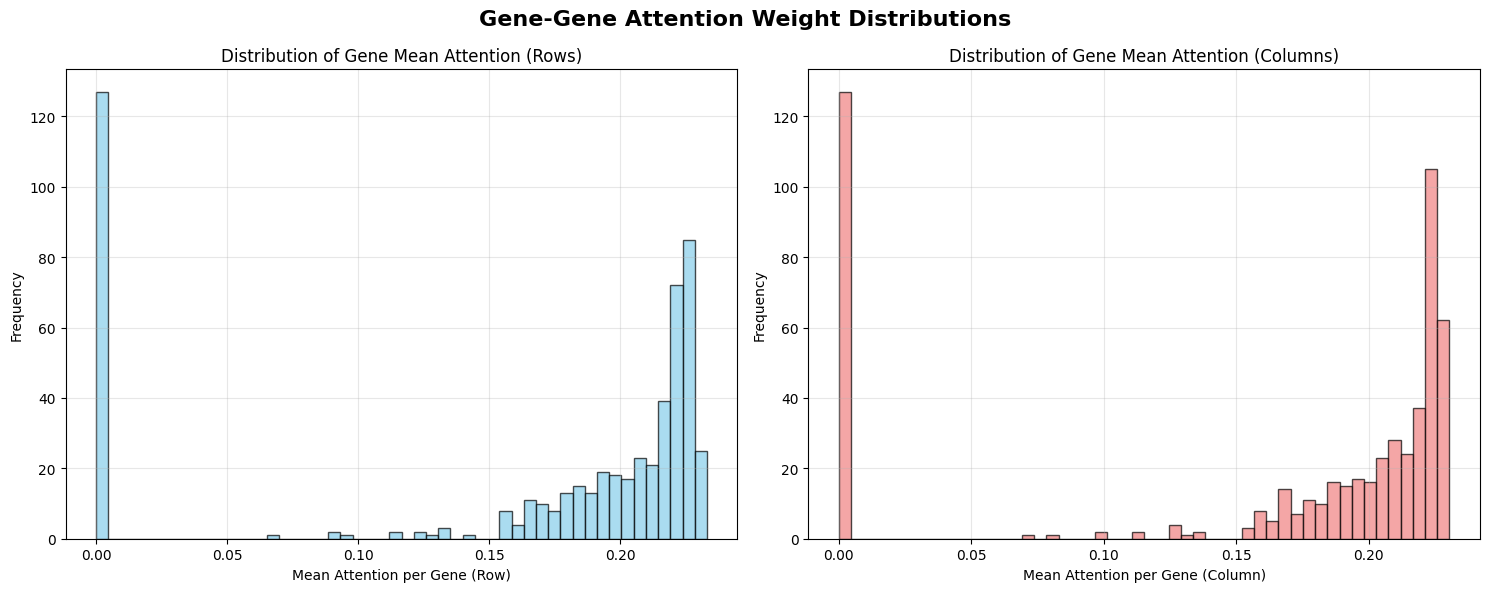

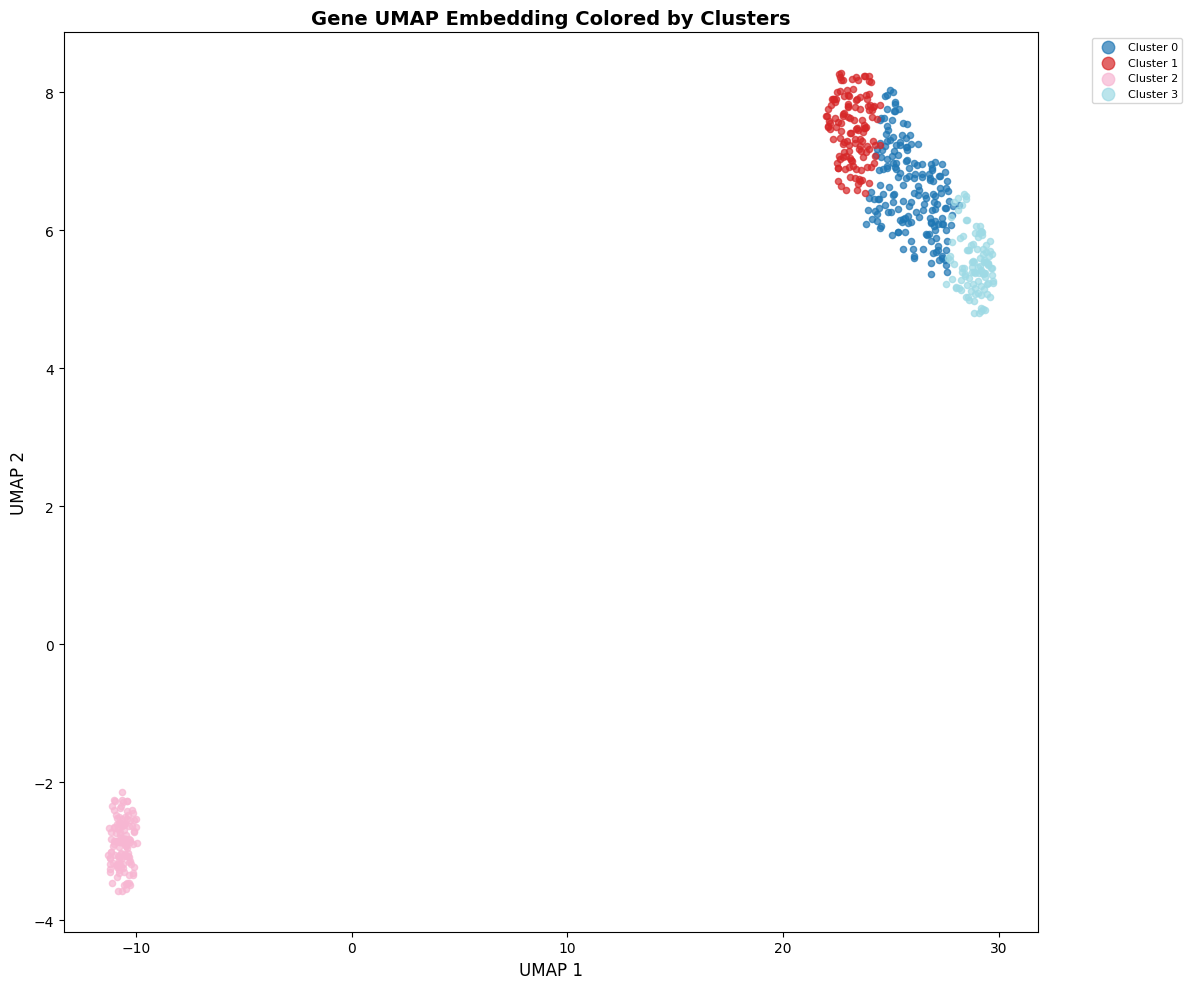

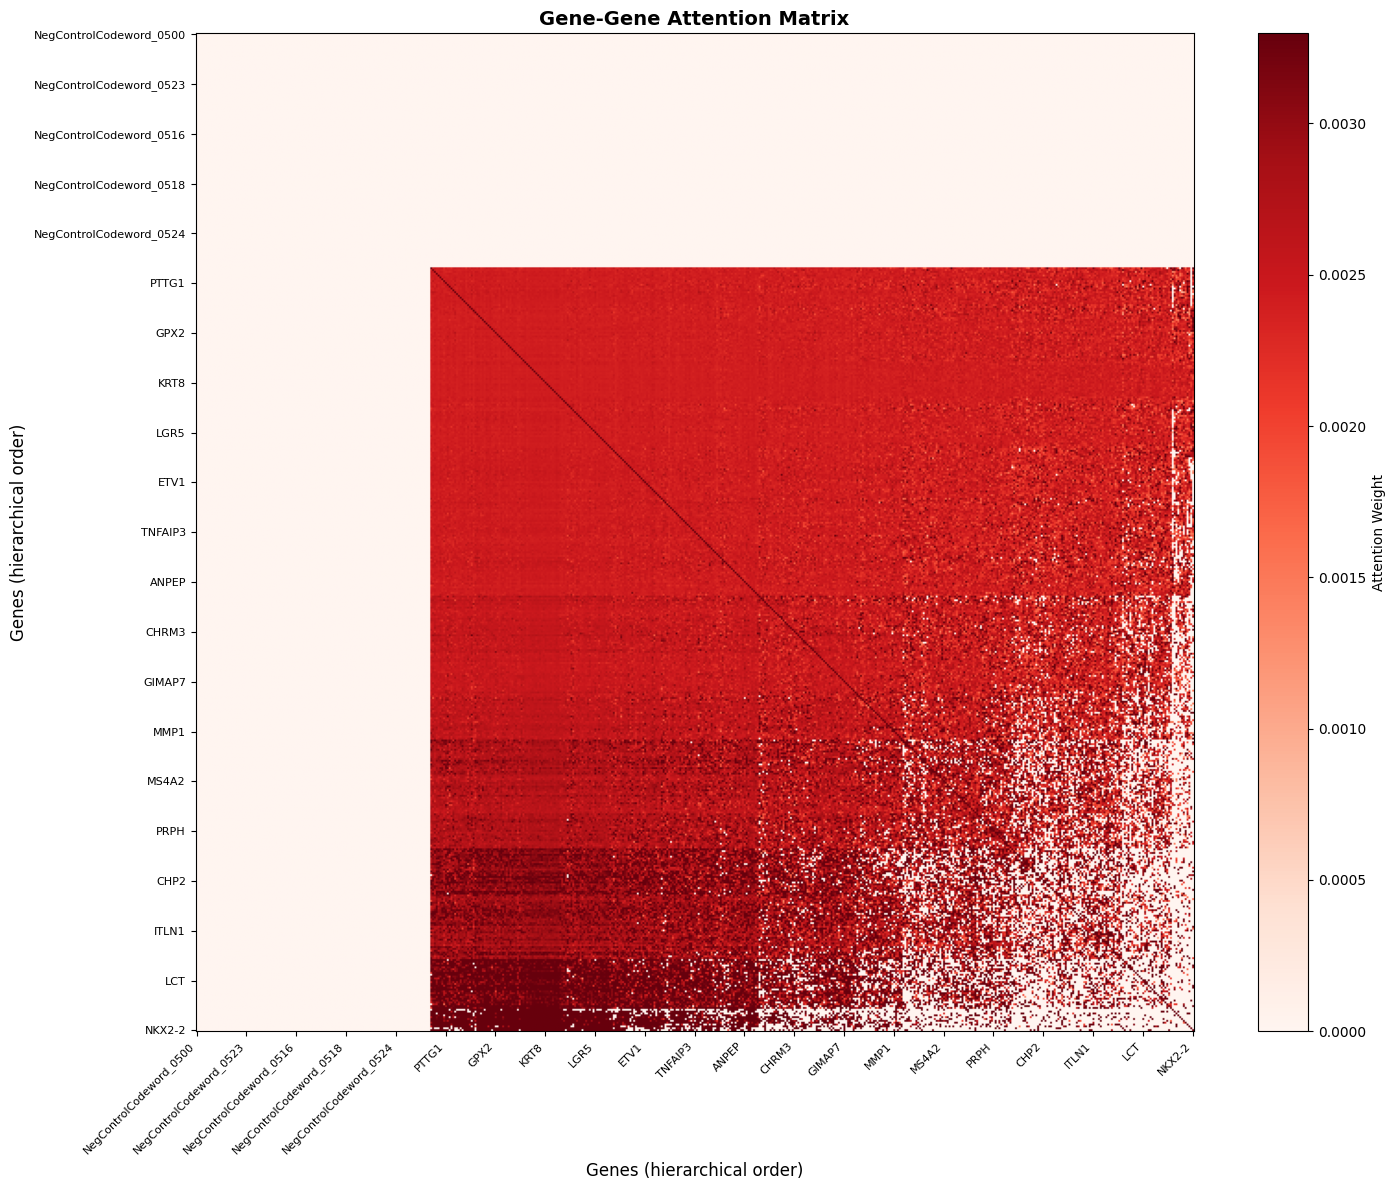

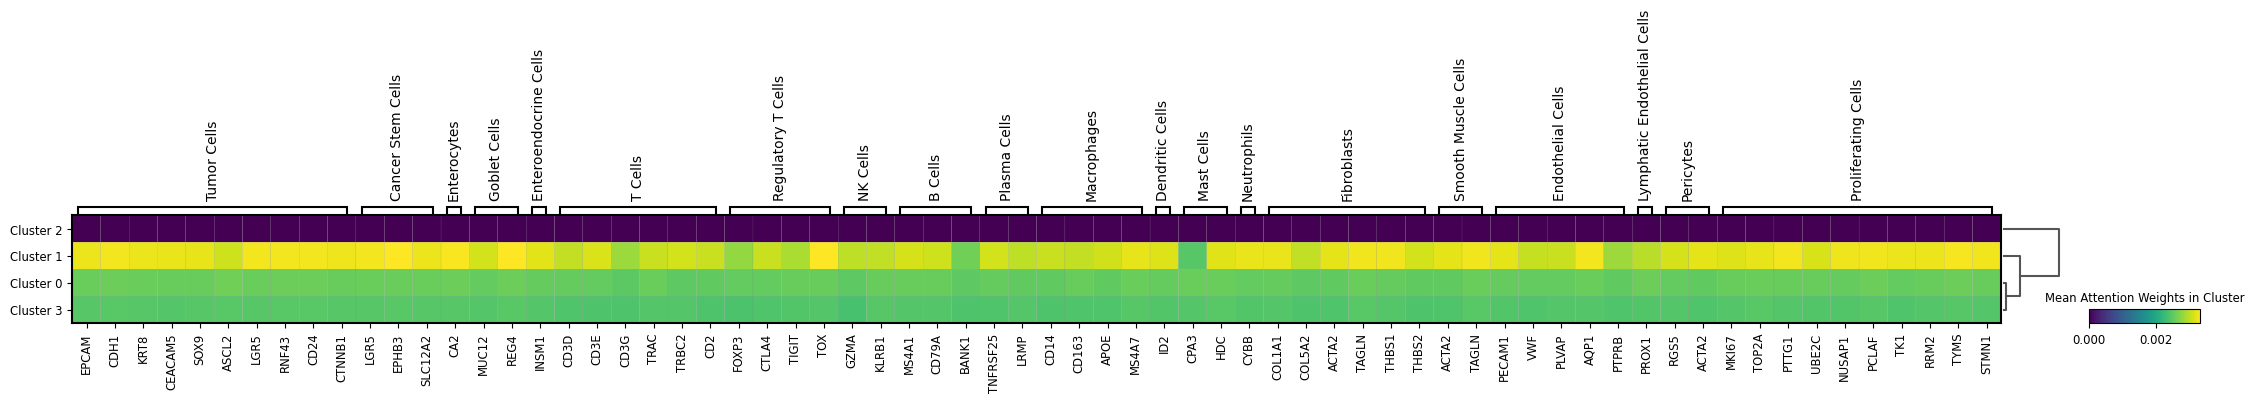

In [2]:
# Load the attention results
with open(Path('/dkfz/cluster/gpu/data/OE0606/fengyun/attention_results/colon') / f'attention_gene_matrix_dict_{model_type}_{edge_type}_{test_mode}.pkl', 'rb') as f:
    attention_results = pickle.load(f)
    
attention_matrices = attention_results['adj_avg_matrix']
gene_names = attention_results['gene_names']

# Initialize the analyzer
analyzer = GeneGeneAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_heads=4, num_layers=5)

kwargs = {'attention_matrices': attention_matrices, 'gene_names': gene_names, 'layer_idx': layer_index, 'marker_genes_dict': marker_genes_dict, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_dotplot': None}

analyzer.run_complete_analysis(**kwargs)

### 1.2 Gene-Gene unnormalized attention results with RNA sequence

Loaded gene-gene attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


UMAP embedding completed:
  - Embedding shape: (541, 2)
Performing leiden clustering...
Clustering completed with 8 clusters
Number of genes in each cluster: [201  99  82  70  57  13  11   8]
Cluster 0: ['C1QBP' 'CDH1' 'NET1' 'CLCA4' 'FERMT1']
Cluster 1: ['RNASE1' 'CXCL13' 'SIT1' 'IRF8' 'MS4A1']
Cluster 2: ['TAGLN' 'TNC' 'RGS5' 'DPYSL3' 'THBS1']
Cluster 3: ['NegControlProbe_00009' 'BLANK_0214' 'PKHD1L1' 'RPS4Y1'
 'NegControlProbe_00039']
Cluster 4: ['KLRC2' 'ANO7' 'BLANK_0267' 'NegControlProbe_00012'
 'NegControlCodeword_0530']
Cluster 5: ['SELENOK' 'PRDX4' 'C2orf88' 'CKAP4' 'FKBP11']
Cluster 6: ['NRG1' 'SCG2' 'SNCA' 'RAB3B' 'SCG5']
Cluster 7: ['KIT' 'IL1RL1' 'CPA3' 'MS4A2' 'SLC18A2']
Creating gene-gene attention heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


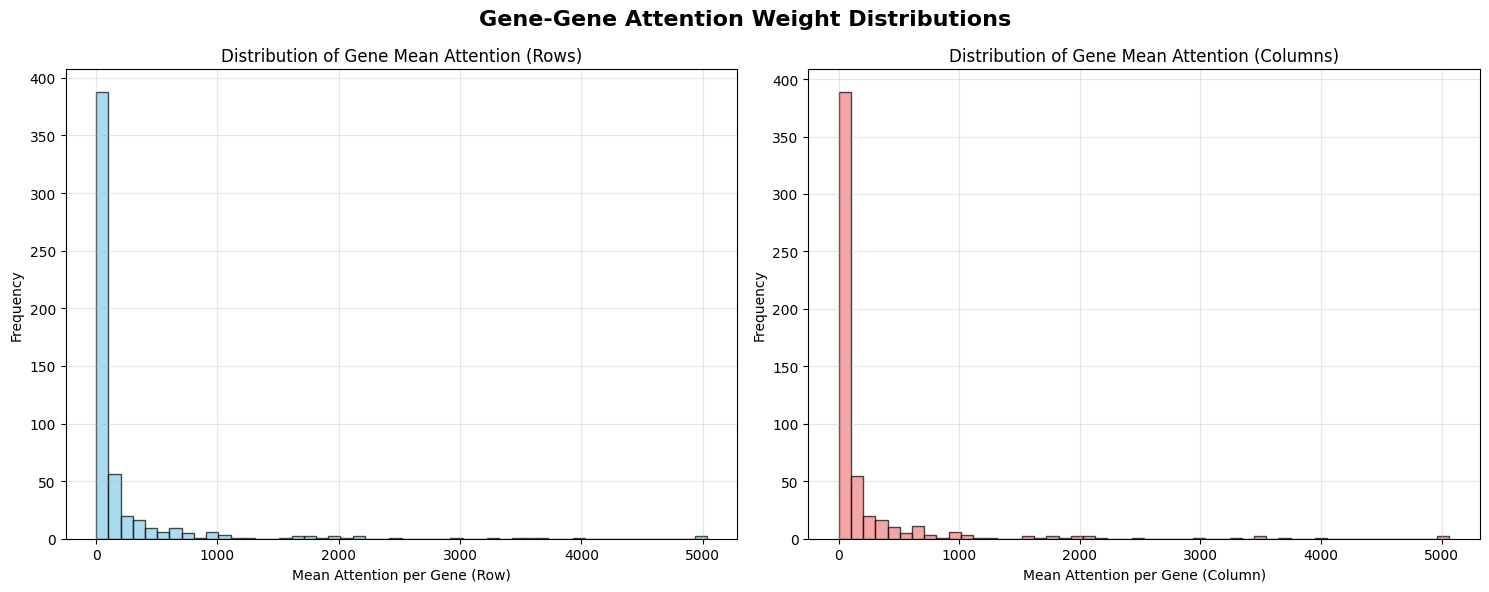

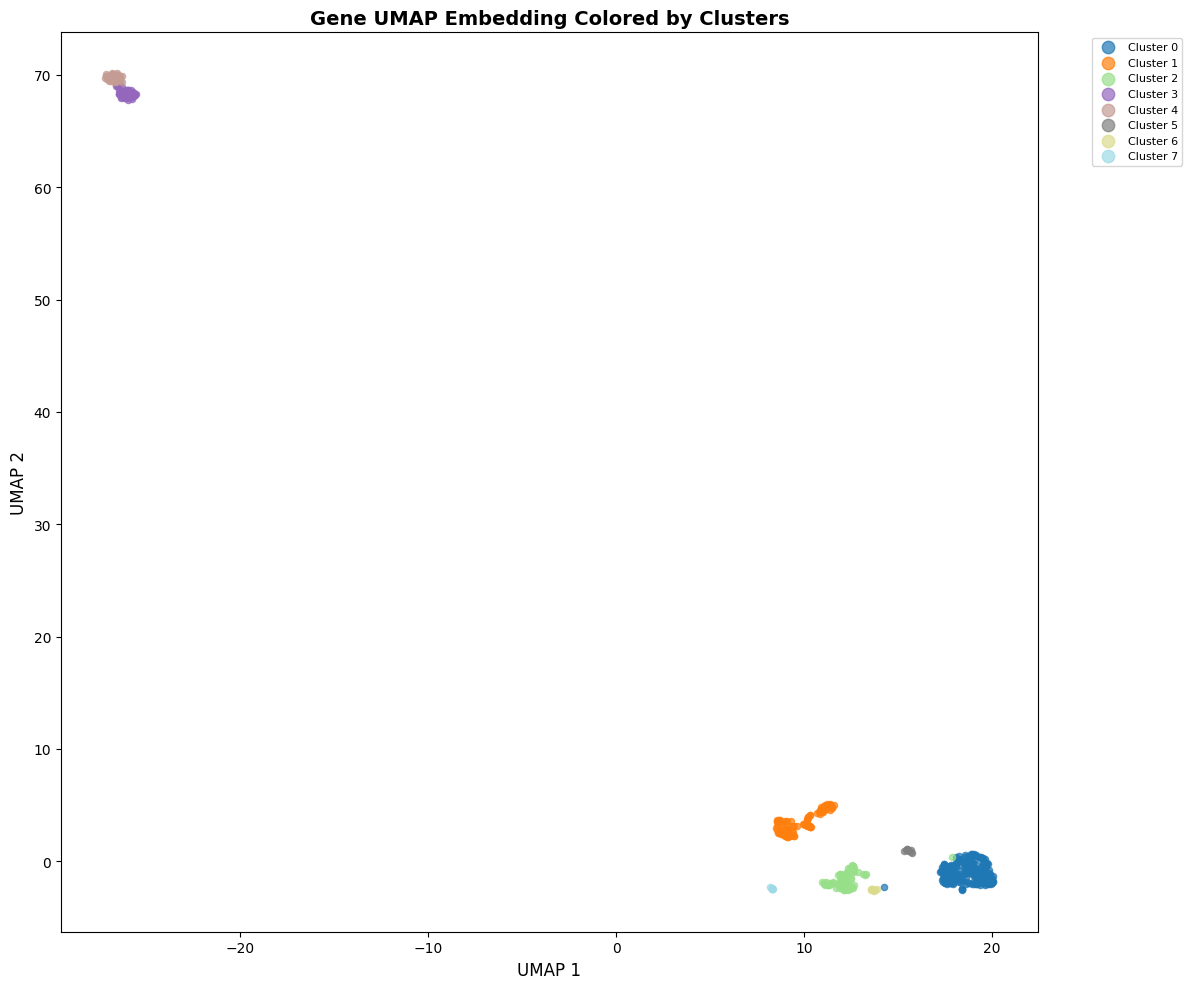

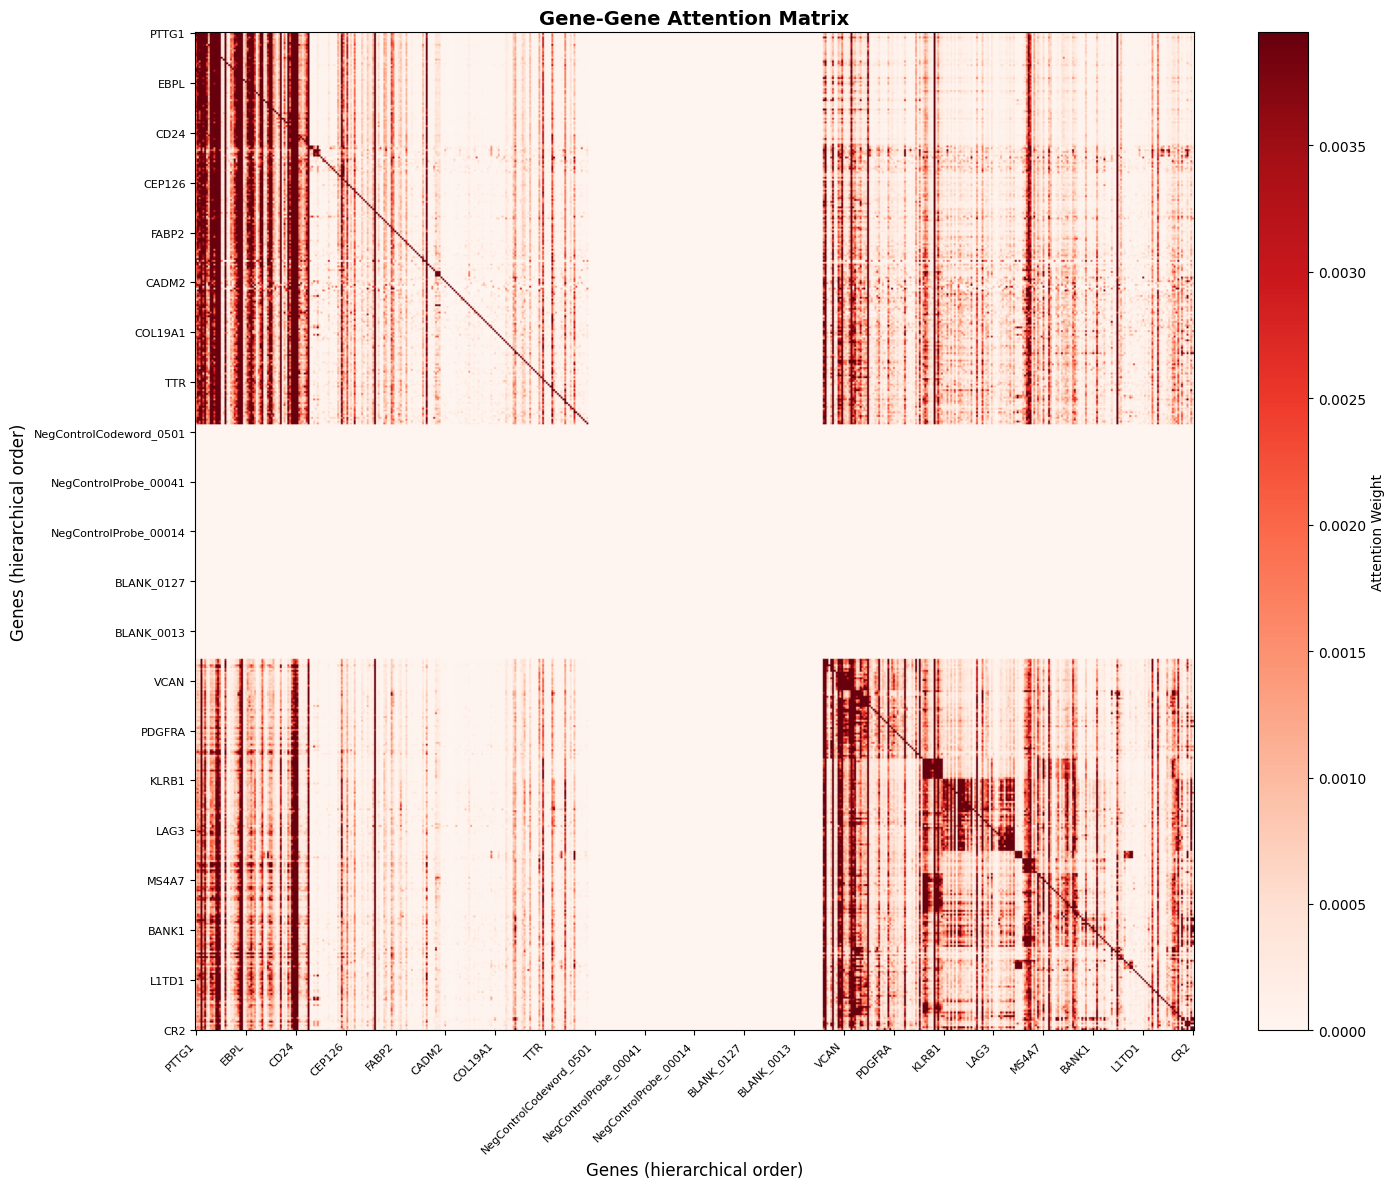

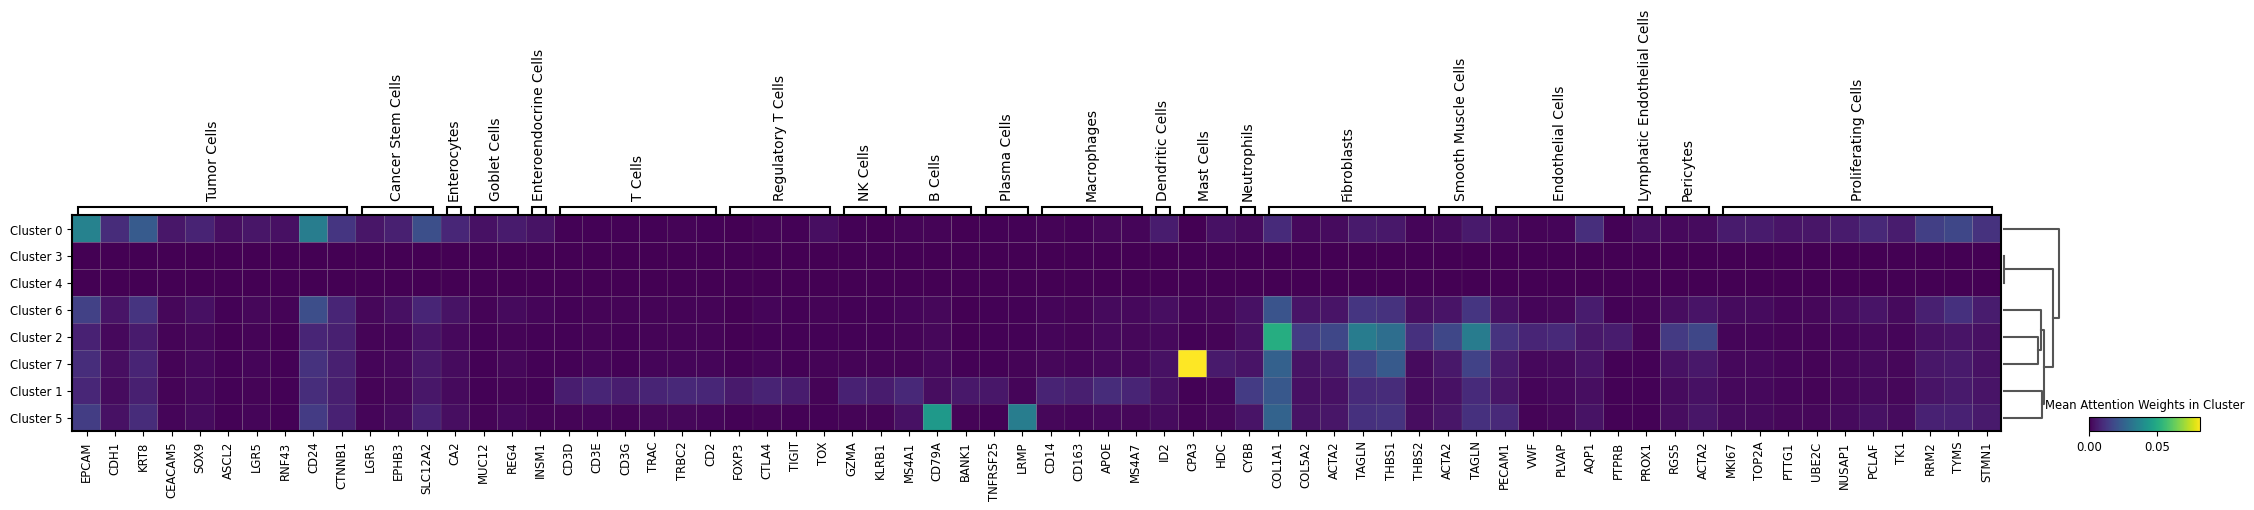

In [3]:
attention_matrices = attention_results['adj_matrix']

layer_index = 4

# Initialize the analyzer
analyzer = GeneGeneAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_heads=4, num_layers=5)

kwargs = {'attention_matrices': attention_matrices, 'gene_names': gene_names, 'layer_idx': layer_index, 'marker_genes_dict': marker_genes_dict, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_dotplot': None}

analyzer.run_complete_analysis(**kwargs)


## 2. Attention visualization results without RNA sequence file

### 2.1 Normalized Attention visualization results without RNA sequence file

Loaded gene-gene attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


UMAP embedding completed:
  - Embedding shape: (541, 2)
Performing leiden clustering...
Clustering completed with 4 clusters
Number of genes in each cluster: [167 129 129 116]
Cluster 0: ['CLCA4' 'HHLA2' 'SIT1' 'NOVA1' 'NRG1']
Cluster 1: ['TAGLN' 'TNC' 'RNASE1' 'C1QBP' 'CDH1']
Cluster 2: ['RGS5' 'SERPINE1' 'KLRC2' 'DMBT1' 'FRZB']
Cluster 3: ['NegControlProbe_00009' 'BLANK_0214' 'NegControlProbe_00039' 'BLANK_0267'
 'NegControlProbe_00012']
Creating gene-gene attention heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


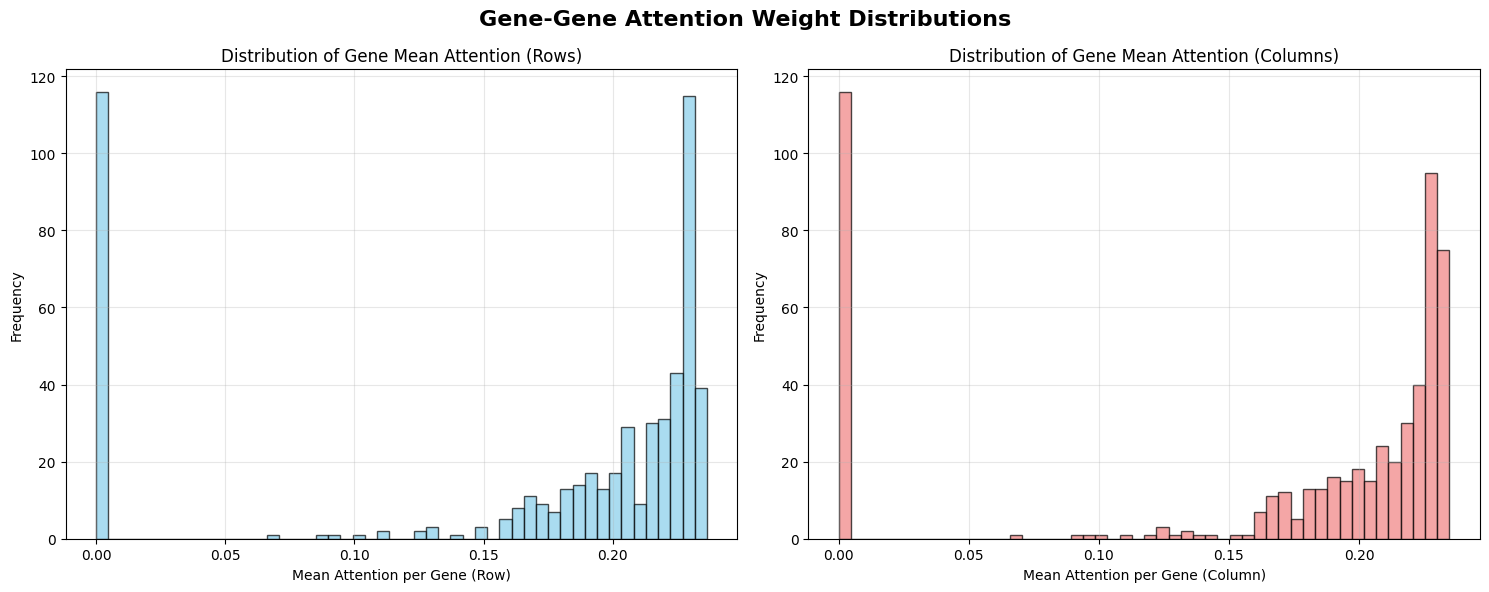

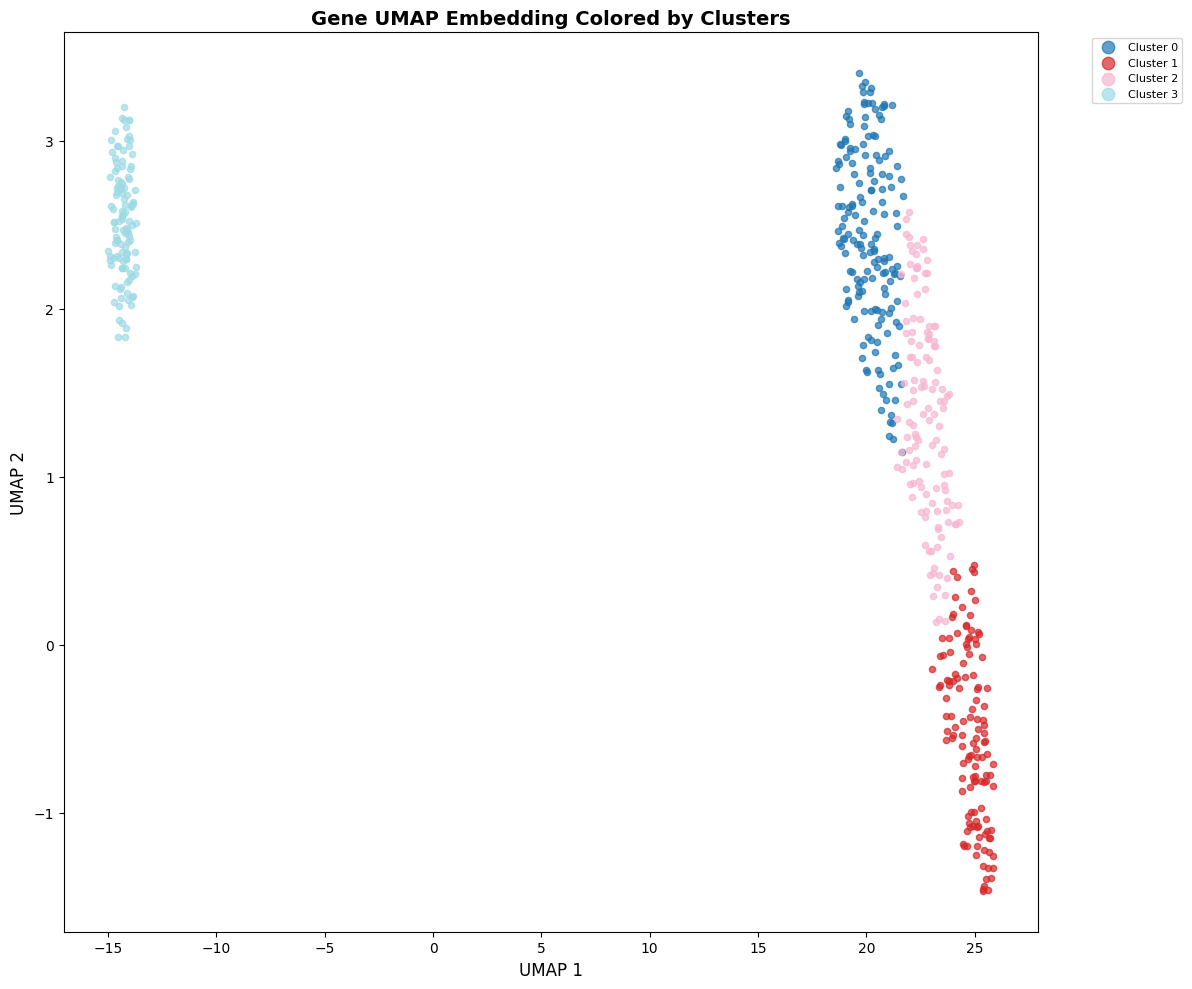

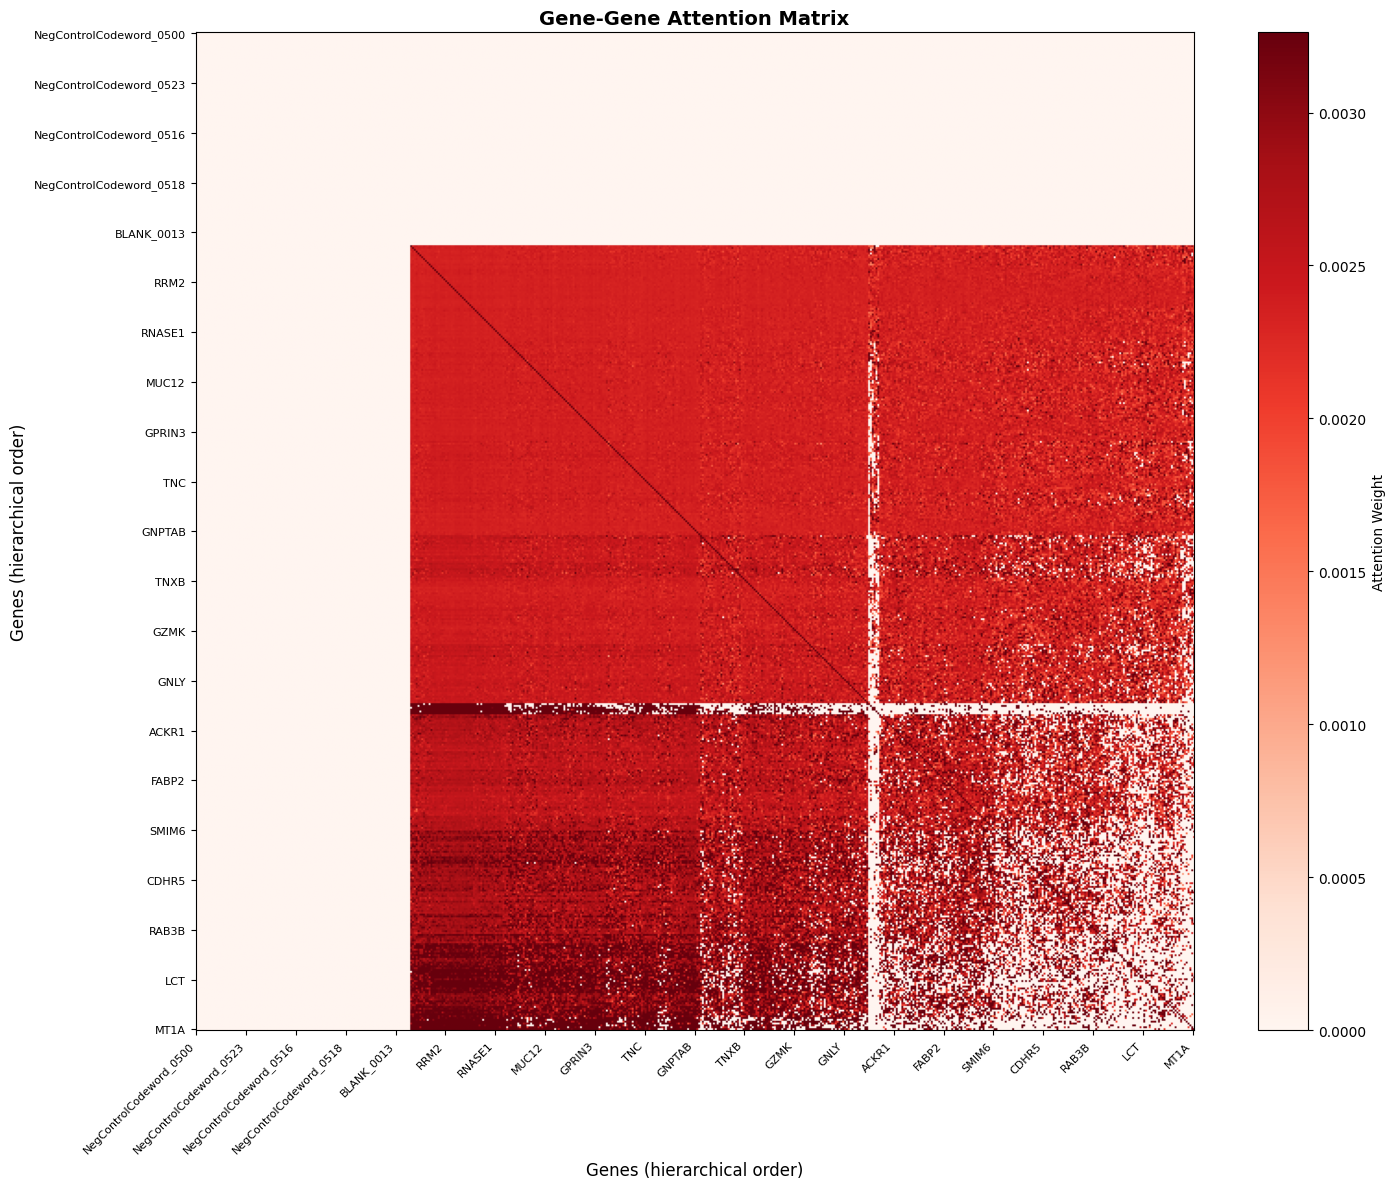

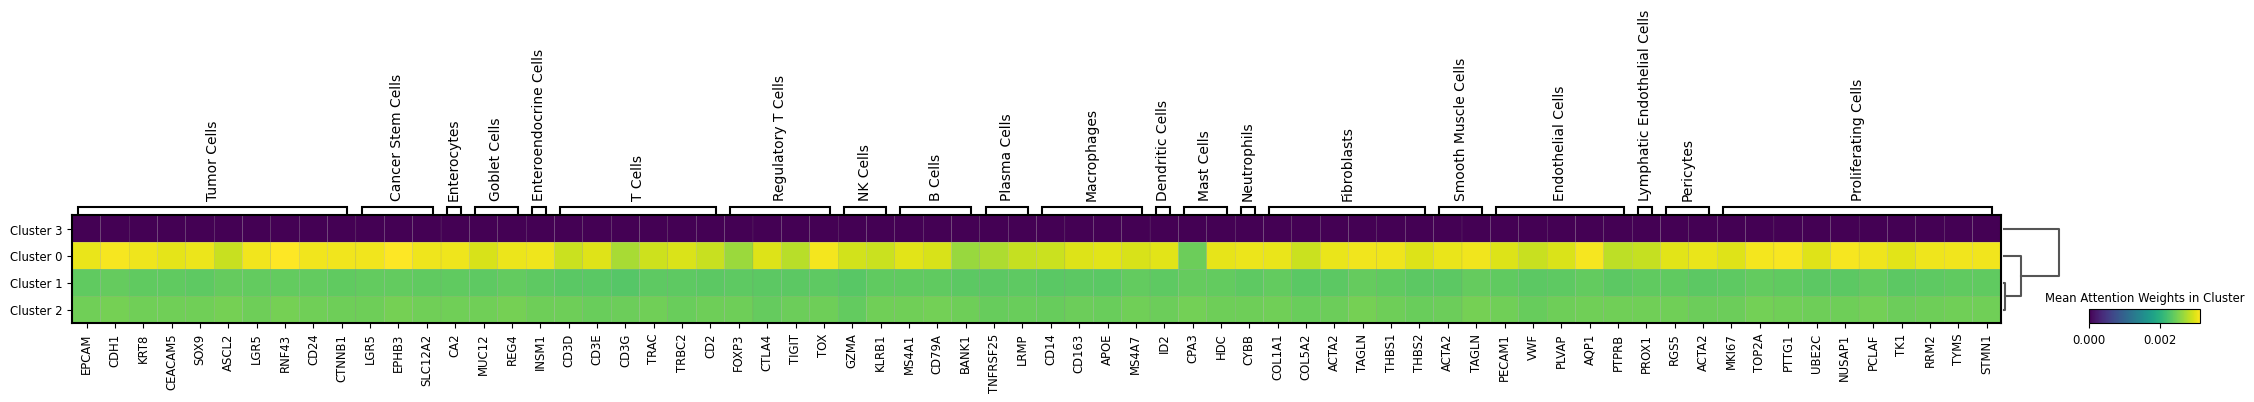

In [4]:
model_type = 'no_seq'
edge_type = 'tx-tx'
layer_index = 4

# Load the attention results
with open(Path('/dkfz/cluster/gpu/data/OE0606/fengyun/attention_results/colon') / f'attention_gene_matrix_dict_{model_type}_{edge_type}_{test_mode}.pkl', 'rb') as f:
    attention_results = pickle.load(f)

attention_matrices = attention_results['adj_avg_matrix']
gene_names = attention_results['gene_names']

# Initialize the analyzer
analyzer = GeneGeneAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_heads=4, num_layers=5)

kwargs = {'attention_matrices': attention_matrices, 'gene_names': gene_names, 'layer_idx': layer_index, 'marker_genes_dict': marker_genes_dict, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 0.8, 'random_state': 42, 'top_k': 5, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_dotplot': None}

analyzer.run_complete_analysis(**kwargs)

## 2.2 Unnormalized Attention results without RNA sequence file

Loaded gene-gene attention data:
  - Attention matrices shape: 5 layers, 4 heads, 541 genes
Normalizing attention weights using layer_norm method...
Attention weights normalized using layer_norm method.
Performing UMAP embedding with n_neighbors=15, min_dist=0.1, metric=cosine...


/home/f833u/fySegger/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


UMAP embedding completed:
  - Embedding shape: (541, 2)
Performing leiden clustering...
Clustering completed with 7 clusters
Number of genes in each cluster: [203 116  86  52  51  21  12]
Cluster 0: ['C1QBP' 'CDH1' 'NET1' 'CLCA4' 'FERMT1']
Cluster 1: ['NegControlProbe_00009' 'BLANK_0214' 'NegControlProbe_00039' 'BLANK_0267'
 'NegControlProbe_00012']
Cluster 2: ['TAGLN' 'TNC' 'RGS5' 'DPYSL3' 'THBS1']
Cluster 3: ['CXCL13' 'SIT1' 'KLRC2' 'GIMAP7' 'ETS1']
Cluster 4: ['RNASE1' 'IRF8' 'MS4A1' 'CXCR5' 'IDO1']
Cluster 5: ['SELENOK' 'PRDX4' 'C2orf88' 'KIT' 'CKAP4']
Cluster 6: ['NRG1' 'SCG2' 'SNCA' 'RAB3B' 'CADM2']
Creating gene-gene attention heatmap...


dendrogram data not found (using key=dendrogram_cluster). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.
Groups are not reordered because the `groupby` categories and the `var_group_labels` are different.
categories: Cluster 0, Cluster 1, Cluster 2, etc.
var_group_labels: Tumor Cells, Cancer Stem Cells, Enterocytes, etc.


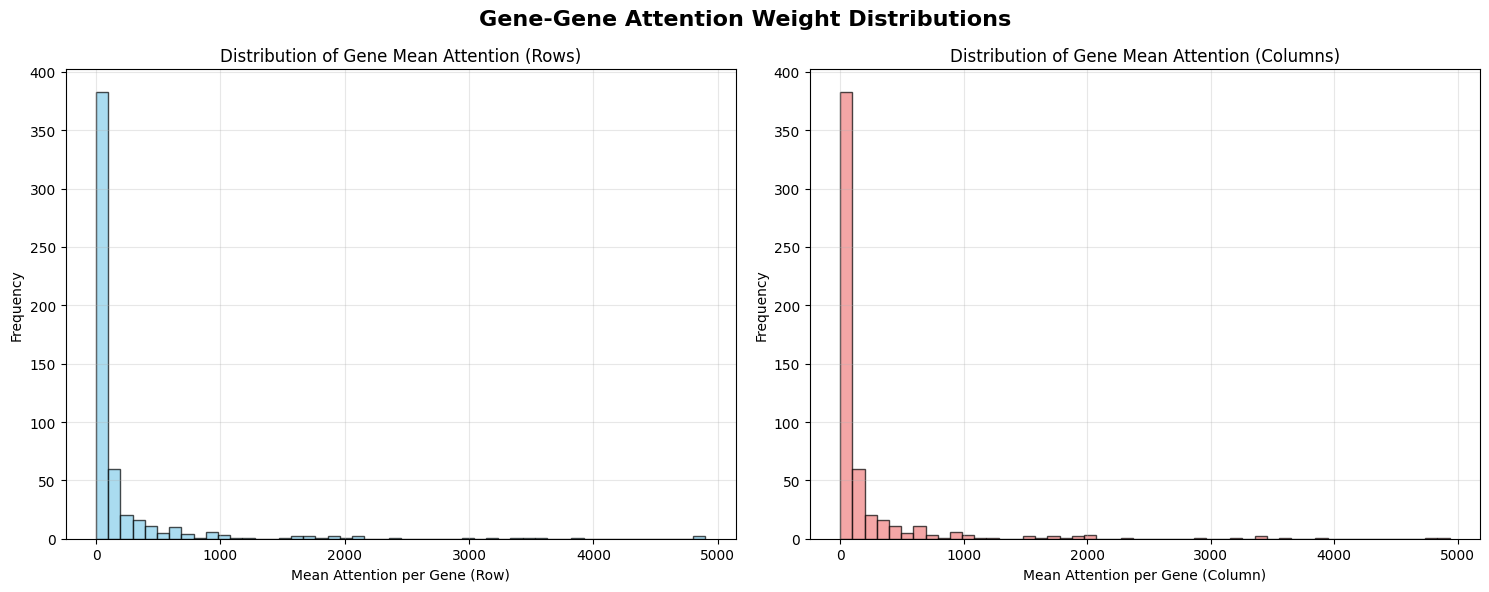

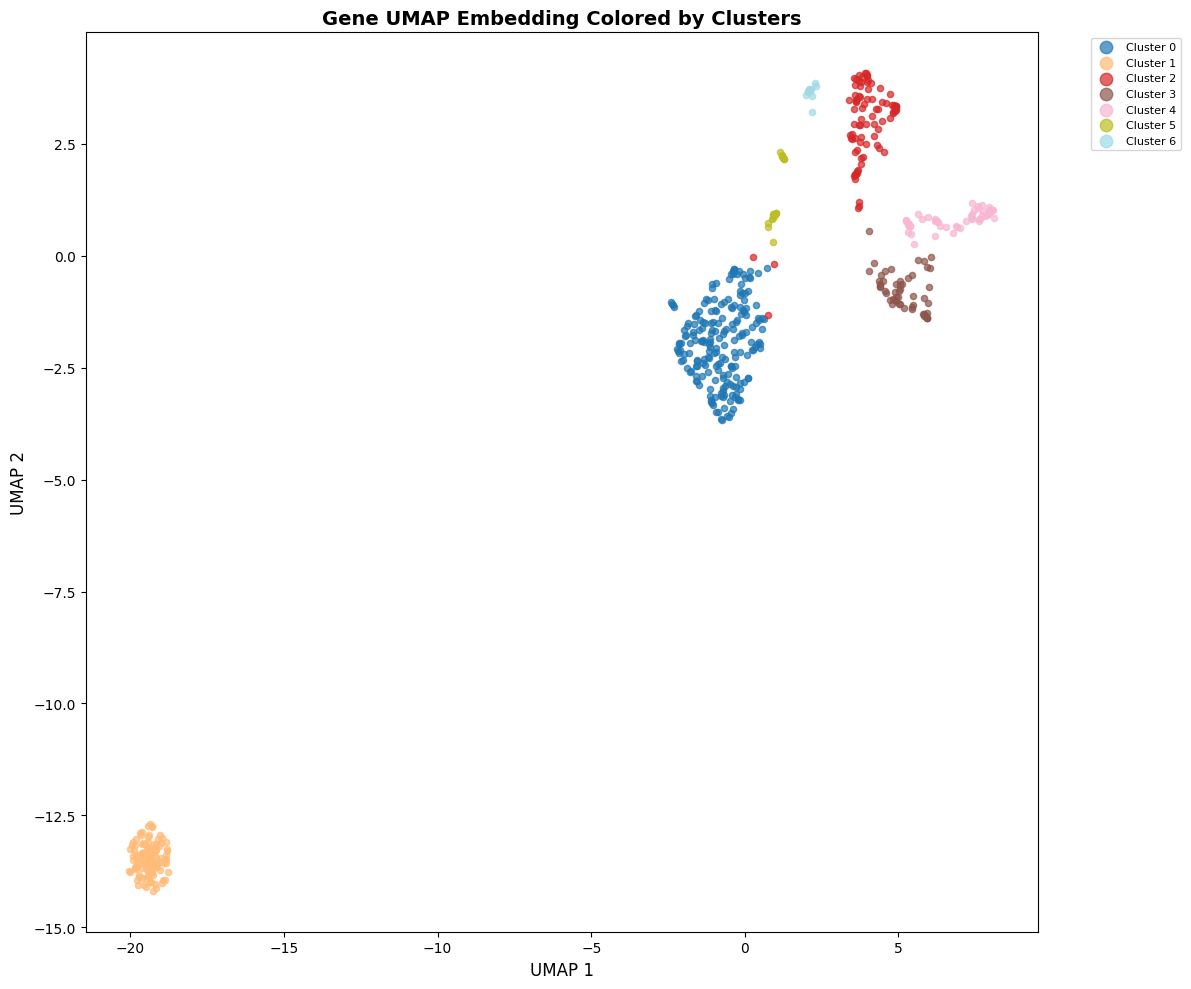

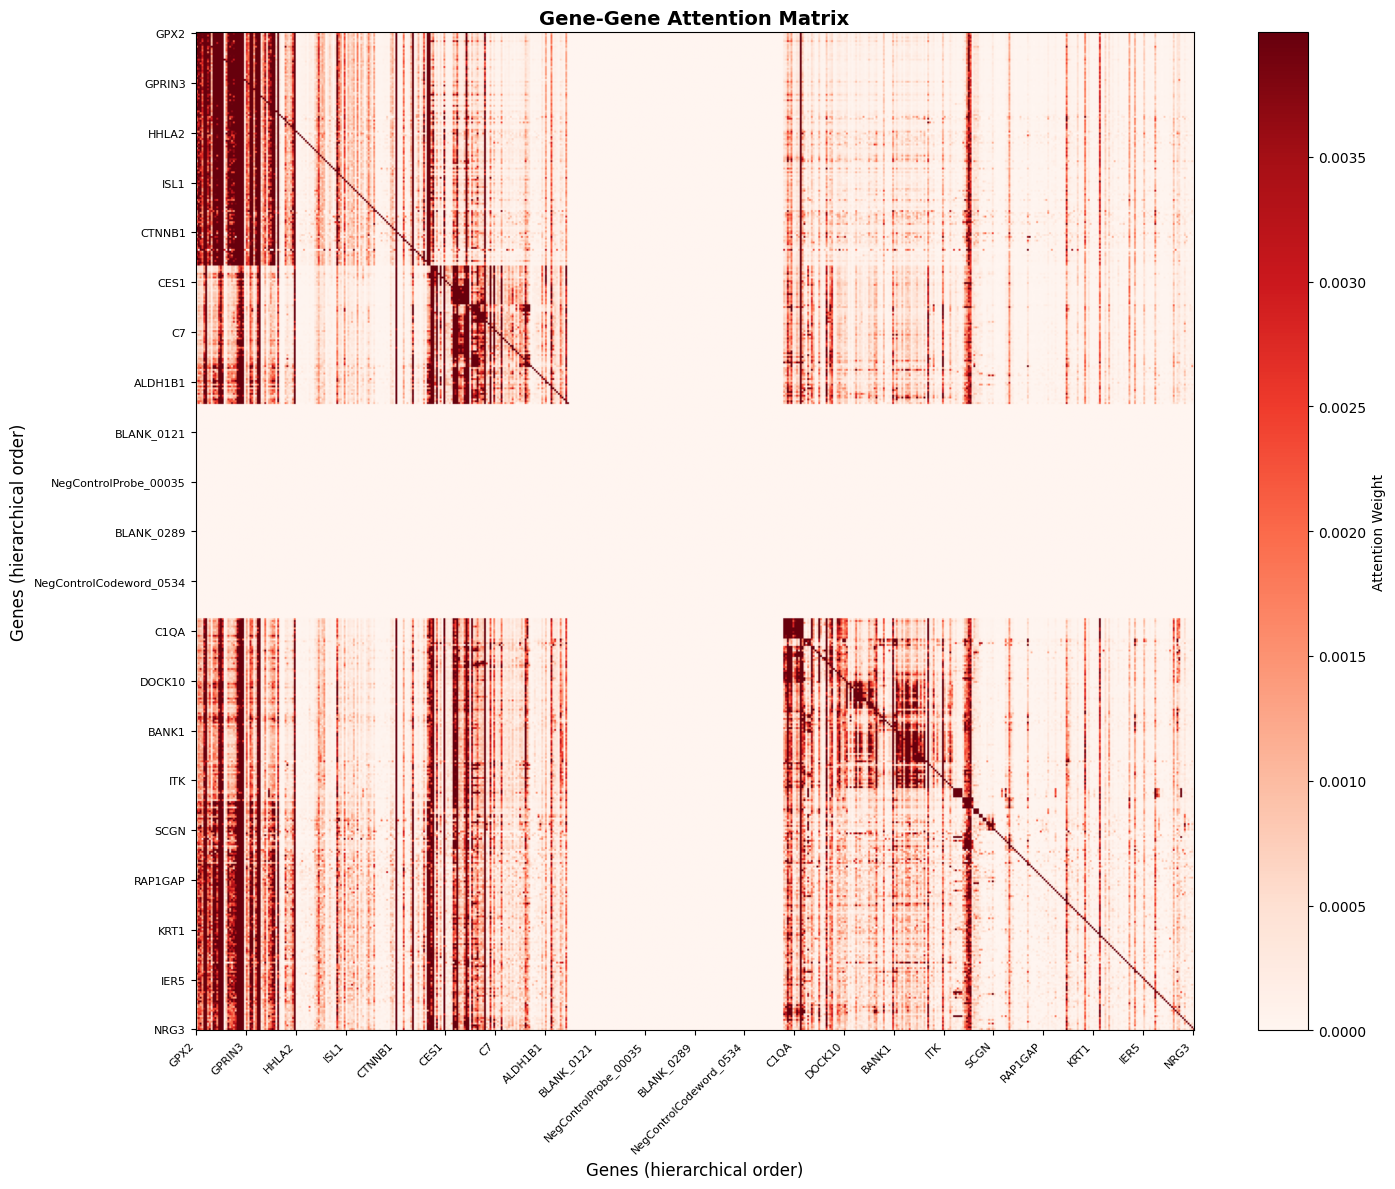

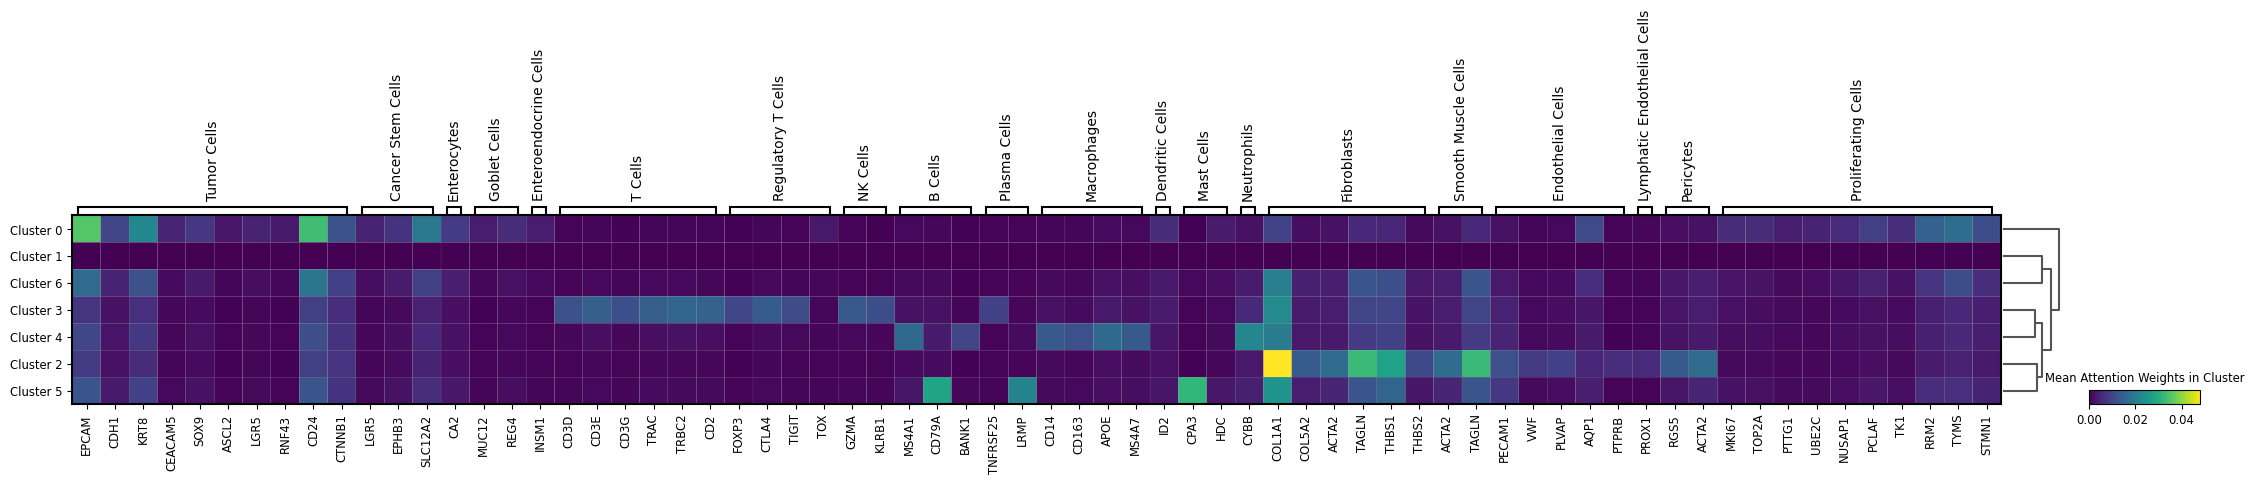

In [5]:
layer_index = 4
attention_matrices = attention_results['adj_matrix']

# Initialize the analyzer
analyzer = GeneGeneAttentionAnalyzer(num_genes=attention_matrices[0][0].shape[0], num_heads=4, num_layers=5)

kwargs = {'attention_matrices': attention_matrices, 'gene_names': gene_names, 'layer_idx': layer_index, 'marker_genes_dict': marker_genes_dict, 'method': 'layer_norm', 'threshold': 0.001, 'clustering_method': 'leiden', 'resolution': 1.0, 'random_state': 42, 'top_k': 5, 'save_path_attention_distribution': None, 'save_path_umap': None, 'save_path_dotplot': None}

analyzer.run_complete_analysis(**kwargs)